In [79]:
import os
import pandas as pd
import numpy as np
import sklearn
import csv

In [92]:
df = pd.read_csv('Charades_vu17_train.csv')

In [81]:
df.head()

,id,subject,scene,quality,relevance,verified,script,objects,descriptions,actions,length
0,46GP8,HR43,Kitchen,6.0,7.0,Yes,A person cooking on a stove while watching som...,food;stove;window,A person cooks food on a stove before looking ...,c092 11.90 21.20;c147 0.00 12.60,24.83
1,N11GT,0KZ7,Stairs,6.0,7.0,Yes,"One person opens up a folded blanket, then sne...",blanket;broom;floor,Person at the bottom of the staircase shakes a...,c098 8.60 14.20;c075 0.00 11.70;c127 0.00 15.2...,18.33
2,0IH69,6RE8,Bedroom,6.0,5.0,Yes,A person is seen leaving a cabinet. They then ...,book;box;cabinet;shelf,A person is standing in a bedroom. They walk o...,NaN,30.25
3,KRF68,YA10,Laundry room,6.0,7.0,Yes,A person runs into their laundry room. They gr...,clothes;door;phone,A person runs in and shuts door. The person gr...,c018 22.60 27.80;c141 4.10 9.60;c148 10.30 25....,30.33
4,MJO7C,6RE8,Kitchen,6.0,6.0,Yes,A person runs into their pantry holding a bott...,cup;phone,A person runs in place while holding a bottle ...,c015 0.00 32.00;c107 0.00 32.00,31.38


In [82]:
df = df[pd.notnull(df['actions'])] # drop NA in column['actions']
# df = df[df.quality >=6 ]
# df = df[df.relevance == 7] #  和 script 的相關性，但我們不需要管 script ，所以用不到
df['origin_index'] = df.index.values
df.head()

In [83]:
df = df.reset_index(drop=True)
df.head()

,id,subject,scene,quality,relevance,verified,script,objects,descriptions,actions,length,origin_index
0,46GP8,HR43,Kitchen,6.0,7.0,Yes,A person cooking on a stove while watching som...,food;stove;window,A person cooks food on a stove before looking ...,c092 11.90 21.20;c147 0.00 12.60,24.83,0
1,N11GT,0KZ7,Stairs,6.0,7.0,Yes,"One person opens up a folded blanket, then sne...",blanket;broom;floor,Person at the bottom of the staircase shakes a...,c098 8.60 14.20;c075 0.00 11.70;c127 0.00 15.2...,18.33,1
2,KRF68,YA10,Laundry room,6.0,7.0,Yes,A person runs into their laundry room. They gr...,clothes;door;phone,A person runs in and shuts door. The person gr...,c018 22.60 27.80;c141 4.10 9.60;c148 10.30 25....,30.33,3
3,MJO7C,6RE8,Kitchen,6.0,6.0,Yes,A person runs into their pantry holding a bott...,cup;phone,A person runs in place while holding a bottle ...,c015 0.00 32.00;c107 0.00 32.00,31.38,4
4,S6MPZ,EA2K,Home Office / Study (A room in a house used fo...,6.0,6.0,Yes,A person is eating at the desk and lying the p...,chair;desk;food;phone;plate;snacks;table,A person in a blue shirt is eating snacks off ...,c009 0.00 4.30;c011 0.00 39.00;c015 0.00 39.00...,38.46,5


In [84]:
dat_id = df['id']
dat_actions = df['actions']
dat_origin_index = df['origin_index']
dat = pd.concat([dat_id, dat_origin_index, dat_actions], axis=1)
split_arr = dat['actions'].str.split(';')

In [85]:
large_arr = []
for element in enumerate(split_arr):
    arr = []
    for i in element[1]:
        k = i.split(" ")
        d = k[0]
        arr.append(d)
    large_arr.append(arr)
dat['split'] = large_arr

In [86]:
dat = dat.drop('actions', 1)

In [87]:
dat.head()

,id,origin_index,split
0,46GP8,0,"[c092, c147]"
1,N11GT,1,"[c098, c075, c127, c153]"
2,KRF68,3,"[c018, c141, c148, c006, c002, c150, c000]"
3,MJO7C,4,"[c015, c107]"
4,S6MPZ,5,"[c009, c011, c015, c019, c156, c059, c061, c06..."


In [88]:
str_actions = dat['split']
int_actions = []
for action in str_actions:
    arr = []
    for act in action:
        a = int(act[1:])
        arr.append(a)
    int_actions.append(arr)

In [110]:
# str_actions # 欲處理對象
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

corpus = str_actions

In [155]:
corpus[0:2]
# model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=10, workers=4)
# model.wv['c000']

In [156]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

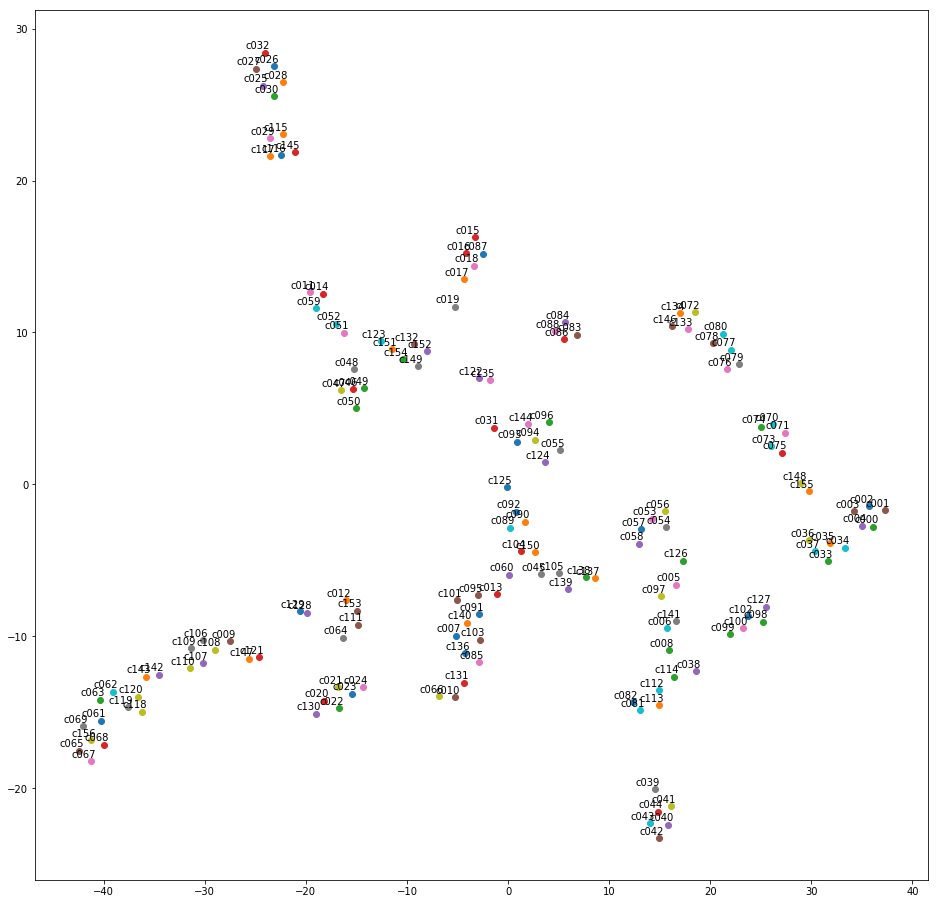

In [157]:
tsne_plot(model)

In [158]:
model.most_similar('c042')

[('c043', 0.997843861579895),
 ('c040', 0.9967547059059143),
 ('c044', 0.9967407584190369),
 ('c041', 0.9934766292572021),
 ('c039', 0.9831447005271912),
 ('c114', 0.976804792881012),
 ('c112', 0.9725741744041443),
 ('c113', 0.9714779853820801),
 ('c008', 0.9714067578315735),
 ('c006', 0.9635142087936401)]